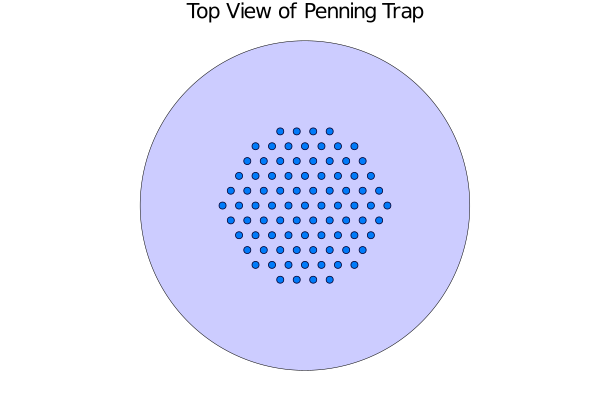

In [1]:
interionic_spacing = .1
up_modifier = sqrt(3)/2 * interionic_spacing
over_modifer = 1/2 * interionic_spacing
points_inside_circle = []
digits = 2
radius = .5
function gen_points(pt, points_inside_circle, x, y)
    pt = [round(pt[1], digits=digits), round(pt[2], digits=digits)]
    if pt in points_inside_circle || pt[1]^2 + pt[2]^2 > radius^2
        return
    else
        push!(points_inside_circle, pt)
        push!(x, pt[1])
        push!(y, pt[2])
        gen_points([pt[1] + over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] - up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] - over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + over_modifer, pt[2] + up_modifier], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] + interionic_spacing, pt[2]], points_inside_circle, x, y)
        gen_points([pt[1] - interionic_spacing, pt[2]], points_inside_circle, x, y)
        return points_inside_circle, x, y 
    end
end
pairs, x, y = gen_points([0, 0], [], [], [])
function circleShape(h, k, r)
    θ = LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end
using Plots
gr() # We will continue onward using the GR backend
plot(x, y, seriestype = :scatter, title = "Top View of Penning Trap")
plot!(circleShape(0, 0, 1), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=.2, aspect_ratio = 1, axis=nothing, border=:none)

In [2]:
z = []
for (i, xx) in enumerate(x)
    if y[i] == 0
        yy = y[i]
        data = read("infid$xx,$yy.csv", String)
        push!(z, data)
    end
end
infid = [el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in z]]

LoadError: SystemError: opening file "infid0.0,0.0.csv": No such file or directory

In [3]:
plot(infid)

LoadError: UndefVarError: infid not defined

In [4]:
z = []
for (i, xx) in enumerate(x)
    if y[i] == 0
        yy = y[i]
        data = read("gauss$xx,$yy.csv", String)
        push!(z, data)
    end
end
gauss = [[[parse(Complex{Float64}, ss) for ss in split(s, ',')[1:end-1]] for s in split(zz, "\n")[1:end-1]] for zz in z]

LoadError: SystemError: opening file "gauss0.0,0.0.csv": No such file or directory

In [5]:
zgauss = [real(adjoint(g) * [[0 1], [1 0]] * g) for g in gauss]

LoadError: UndefVarError: gauss not defined

In [6]:
z = []
for (i, xx) in enumerate(x)
    if y[i] == 0
        yy = y[i]
        data = read("seq$xx,$yy.csv", String)
        push!(z, data)
    end
end
seq = [[[parse(Complex{Float64}, ss) for ss in split(s, ',')[1:end-1]] for s in split(zz, "\n")[1:end-1]] for zz in z]

LoadError: SystemError: opening file "seq0.0,0.0.csv": No such file or directory

In [7]:
zseq = [real(adjoint(s) * [[0 1], [1 0]] * s) for s in seq]

LoadError: UndefVarError: seq not defined

In [8]:

plot([el[1] for el in zgauss])

LoadError: UndefVarError: zgauss not defined

In [9]:
plot([el[1] for el in zseq])

LoadError: UndefVarError: zseq not defined

In [10]:

plot([el[1] for el in zseq - zgauss])

LoadError: UndefVarError: zseq not defined

In [3]:
z = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("displaced_gaussian/infid$xx,$yy.csv", String)
    push!(z, data)
end
z = [el[1] for el in [[parse(Float64, s) for s in split(zz, "\n")[1:end-1]] for zz in z]]

87-element Array{Float64,1}:
 -4.524297113372988e-5
 -4.516186228054053e-5
  0.0002625743937938463
  0.019629603145885688
  0.02005004663880472
  0.0025757930352315883
  0.03239488370116783
  0.006314270848524761
  0.033443947510568006
  0.00633728346431206
  0.032308925957190926
  0.0025854526758009033
  0.020074136808785337
  ⋮
  0.024889033507240144
  0.003660580656241086
  0.00353808021704749
  0.003328937096744533
  0.002148151356675898
  0.005493531954878228
  0.00031739359045657167
  0.0009523593215258197
  0.0010967103390889799
  0.0051340462148184995
  0.0006715387228278802
  0.0033563790166493135

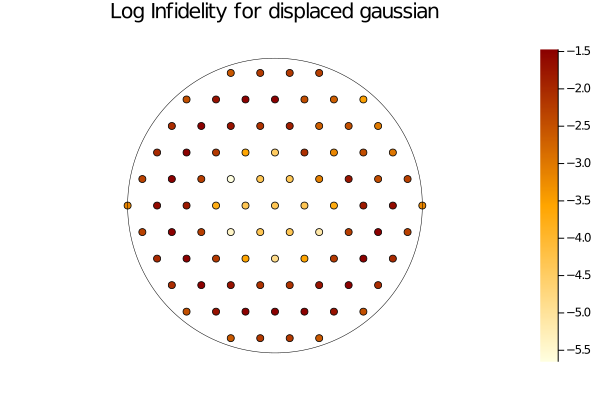

In [5]:
using Plots
#plot(x, y, seriestype = :scatter, title = "Top View of Penning Trap")
scatter(x, y, marker_z = log.(10, abs.(z)),  c = :heat)
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title="Log Infidelity for displaced gaussian")

In [7]:
maximum(z)

0.03378229356686335

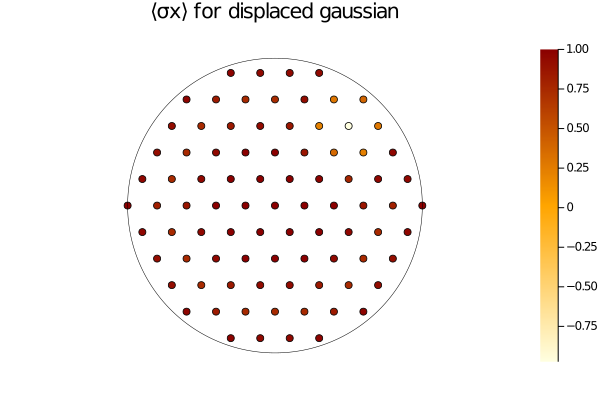

In [16]:
z = []
for (i, xx) in enumerate(x)
    yy = y[i]
    data = read("displaced_gaussian/seq$xx,$yy.csv", String)
    push!(z, data)
end
seq = [[parse(Complex{Float64}, ss) for ss in split(s, ',')[1:end-1]] for s in [replace(zz, "\n"=>",") for zz in z]]
zseq = [real(adjoint(s) * [0, 1, 1, 0]) for s in seq]
scatter(x, y, marker_z = zseq,  c = :heat)
plot!(circleShape(0, 0, .5), seriestype = [:shape,], lw = .5, c=:blue, lincolor = :black, legend=false, fillalpha=0, aspect_ratio = 1, axis=nothing, border=:none, title="⟨σx⟩ for displaced gaussian")